# Model Building

In [1]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings

In [2]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### Making new features

In [3]:
df['log_Subscription_Length_Months'] = np.log(df['Subscription_Length_Months'])
df['log_Monthly_Bill'] = np.log(df['Monthly_Bill'])
df['log_Total_Usage_GB'] = np.log(df['Total_Usage_GB'])

In [4]:
df['interaction_feature'] = df['Subscription_Length_Months'] * df['Monthly_Bill']

In [5]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,log_Subscription_Length_Months,log_Monthly_Bill,log_Total_Usage_GB,interaction_feature
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,2.833213,4.295379,5.463832,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,0.000000,3.886910,5.147494,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,1.609438,4.448165,6.131226,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,1.098612,4.584355,5.693732,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,2.944439,4.062854,5.583496,1104.66


### Preaparing X and y

In [6]:
X = df.drop(['CustomerID','Name','Churn'],axis=1)
y =df['Churn']

In [7]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=4)
X_train.shape, X_test.shape

((75000, 15), (25000, 15))

### Create an Evaluate Function to give all metrics after model Training

In [10]:
def evaluate_model(true, predicted):
    acc_score =accuracy_score(true, predicted)
    precision= precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return acc_score,precision,recall

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoost": GradientBoostingClassifier(),
}
model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_acc , model_train_precision, model_train_recall = evaluate_model(y_train, y_train_pred)

    model_test_acc , model_test_precision, model_test_recall = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_acc))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_acc))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    accuracy_list.append(model_test_acc)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy Score: 0.5068
- Precision: 0.5051
- Recall: 0.3611
----------------------------------
Model performance for Test set
- Accuracy Score: 0.4992
- Precision: 0.4998
- Recall: 0.3535


Decision Tree
Model performance for Training set
- Accuracy Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.4974
- Precision: 0.4980
- Recall: 0.4923


Random Forest
Model performance for Training set
- Accuracy Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy Score: 0.4988
- Precision: 0.4994
- Recall: 0.4686


XGBoost
Model performance for Training set
- Accuracy Score: 0.6716
- Precision: 0.6772
- Recall: 0.6480
----------------------------------
Model performance for Test set
- Accuracy Score: 0.5054
- Precision: 0.5062
- Recall: 0.4826


GradientBoost
Model performance for 

In [31]:
metrics_df=pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],ascending=False)
metrics_df



,Model Name,Accuracy_Score
3,XGBoost,0.50536
0,Logistic Regression,0.49924
2,Random Forest,0.49884
4,GradientBoost,0.49756
1,Decision Tree,0.49740


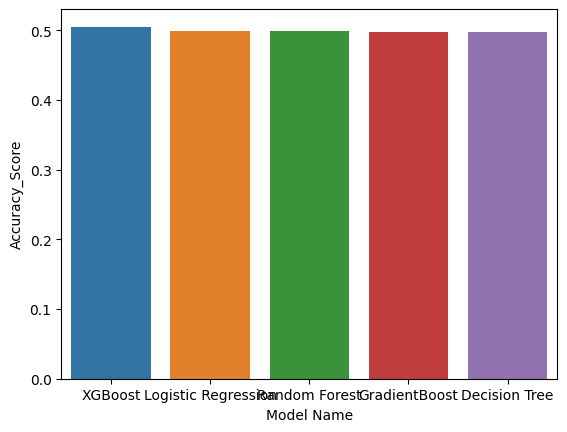

In [13]:
sns.barplot(data=metrics_df,x=metrics_df['Model Name'],y=metrics_df['Accuracy_Score'])
plt.show()

### Neural Network

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [26]:
model = Sequential()



# Input layer
model.add(Dense(units=64, input_dim=15, activation='relu'))
model.add(BatchNormalization())

# Hidden layers with dropout and L2 regularization
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1024      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.25, verbose=2)

Epoch 1/50
1758/1758 - 10s - loss: 1.6581 - accuracy: 0.5006 - val_loss: 0.7605 - val_accuracy: 0.5035 - 10s/epoch - 6ms/step
Epoch 2/50
1758/1758 - 7s - loss: 0.7201 - accuracy: 0.4986 - val_loss: 0.7131 - val_accuracy: 0.4944 - 7s/epoch - 4ms/step
Epoch 3/50
1758/1758 - 13s - loss: 0.7156 - accuracy: 0.5009 - val_loss: 0.7175 - val_accuracy: 0.5053 - 13s/epoch - 8ms/step
Epoch 4/50
1758/1758 - 13s - loss: 0.7165 - accuracy: 0.5031 - val_loss: 0.7144 - val_accuracy: 0.5006 - 13s/epoch - 7ms/step
Epoch 5/50
1758/1758 - 8s - loss: 0.7126 - accuracy: 0.5001 - val_loss: 0.7128 - val_accuracy: 0.5050 - 8s/epoch - 4ms/step
Epoch 6/50
1758/1758 - 7s - loss: 0.7081 - accuracy: 0.5026 - val_loss: 0.7083 - val_accuracy: 0.4990 - 7s/epoch - 4ms/step
Epoch 7/50
1758/1758 - 10s - loss: 0.7053 - accuracy: 0.4985 - val_loss: 0.7032 - val_accuracy: 0.4994 - 10s/epoch - 6ms/step
Epoch 8/50
1758/1758 - 8s - loss: 0.7022 - accuracy: 0.5013 - val_loss: 0.6973 - val_accuracy: 0.5005 - 8s/epoch - 4ms/step


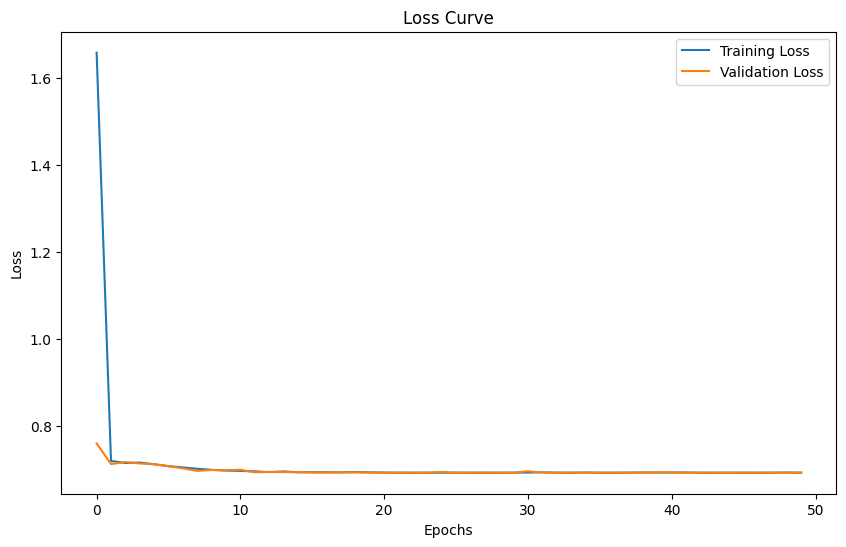

In [30]:
# Visualize the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Model selection

im choosing XGboost as its giving better accuracy

In [32]:
XgClf = XGBClassifier()
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3],
    'min_child_weight': [1, 2, 3, 4],
}


In [33]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV( XgClf, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1,verbose=2)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 1, 2, 3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy', verbose=2)

In [35]:

# Get the best parameters and their corresponding accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best_Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best_Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.6}
Best Accuracy: 0.50404


In [38]:
best_params = {
    'n_estimators': 100,
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.9,  #
    'colsample_bytree': 0.6,
    'gamma': 2,
    'min_child_weight': 4,
}

In [39]:
clf_model = XGBClassifier(**best_params)

clf_model.fit(X_train,y_train)
y_pred= clf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.49976

In [40]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf_model, model_file)